In [157]:
import bagpy
from bagpy import bagreader

In [158]:
#Reading the rosbag file which was generated due to published variables in the script itself.
b = bagreader('/home/martinbraas/bagfiles/2021-06-04-18-30-50.bag')

[INFO]  Successfully created the data folder /home/martinbraas/bagfiles/2021-06-04-18-30-50.


In [159]:
#Looking at the data collected, to see what data could be interesting
b.topic_table

Topics                                  Types  \
0                           /clock                    rosgraph_msgs/Clock   
1                         /cmd_vel                    geometry_msgs/Twist   
2              /gazebo/link_states                 gazebo_msgs/LinkStates   
3             /gazebo/model_states                gazebo_msgs/ModelStates   
4   /gazebo/parameter_descriptions  dynamic_reconfigure/ConfigDescription   
5        /gazebo/parameter_updates             dynamic_reconfigure/Config   
6      /gazebo/performance_metrics         gazebo_msgs/PerformanceMetrics   
7                             /imu                        sensor_msgs/Imu   
8                    /joint_states                 sensor_msgs/JointState   
9                            /odom                      nav_msgs/Odometry   
10                         /rosout                      rosgraph_msgs/Log   
11                     /rosout_agg                      rosgraph_msgs/Log   
12                           /scan                  sensor_msgs/LaserScan   
13                             /tf                     tf2_msgs/TFMessage   

    Message Count    Frequency  
0           98708  1000.000000  
1            7161    62.500000  
2           98526          NaN  
3           98539  1000.000000  
4               1          NaN  
5               1          NaN  
6             508     5.128205  
7           95776  1000.000000  
8            2956    30.303030  
9            2956    23.809524  
10             13          NaN  
11              2   250.000000  
12            492     5.000000  
13           2956    30.303030

In [160]:
odometry = b.odometry_data()
vel_msg = b.vel_data()

In [161]:
import pandas as pd
odometrydf = pd.read_csv(odometry[0])
vel_msgdf = pd.read_csv(vel_msg[0])

In [162]:
#See different values stored in topic
#odometrydf
vel_msgdf

Time  linear.x  linear.y  linear.z  angular.x  angular.y  angular.z
0     199.324      0.15       0.0       0.0   0.022800        0.0        0.3
1     199.340      0.15       0.0       0.0   0.023810        0.0        0.3
2     199.356      0.15       0.0       0.0   0.024803        0.0        0.3
3     199.372      0.15       0.0       0.0   0.025781        0.0        0.3
4     199.388      0.15       0.0       0.0   0.026744        0.0        0.3
...       ...       ...       ...       ...        ...        ...        ...
7156  296.623      0.00       0.0       0.0   0.125682        0.0        1.0
7157  296.631      0.00       0.0       0.0   0.125665        0.0        1.0
7158  296.639      0.00       0.0       0.0   0.125647        0.0        1.0
7159  296.647      0.00       0.0       0.0   0.125630        0.0        1.0
7160  296.655      0.00       0.0       0.0   0.125613        0.0        1.0

[7161 rows x 7 columns]

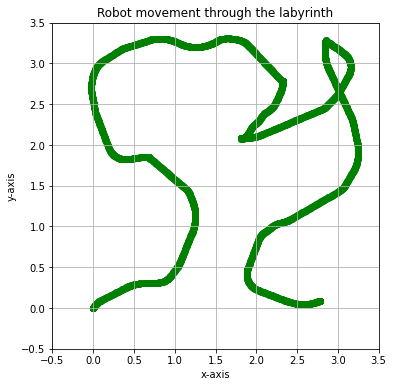

In [163]:
#Plot of the robots movement through the labyrinth

import matplotlib.pyplot as plt
import numpy as np

path = ([odometrydf['pose.x'], odometrydf['pose.y']])

fig, ax = plt.subplots()
#plt.figure(figsize=(4, 4))
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Robot movement through the labyrinth')
plt.grid()
ax.set_xlim(xmin = -0.5, xmax = 3.5)
ax.set_ylim(ymin = -0.5, ymax = 3.5)
ax.set_aspect('equal')
plt.scatter(path[0], path[1], color='g')
plt.show()

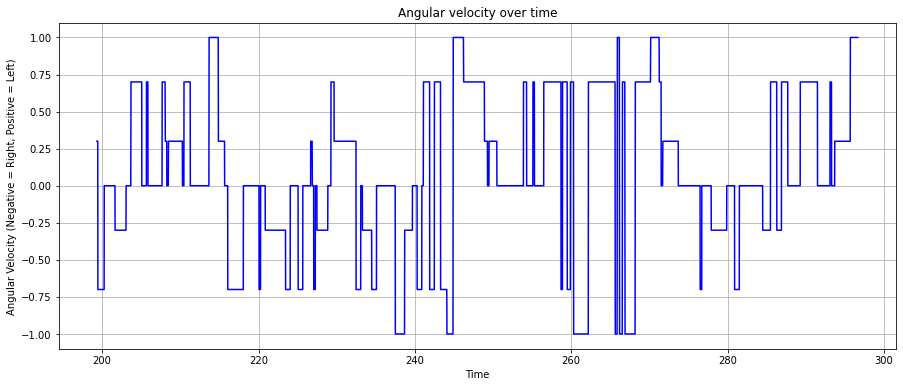

In [164]:
#Angular velocity data
fig, ax = plt.subplots()
plt.grid()
plt.title('Angular velocity over time')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (Negative = Right, Positive = Left)')
plt.plot(vel_msgdf['Time'], vel_msgdf['angular.z'], color='b')
plt.show()

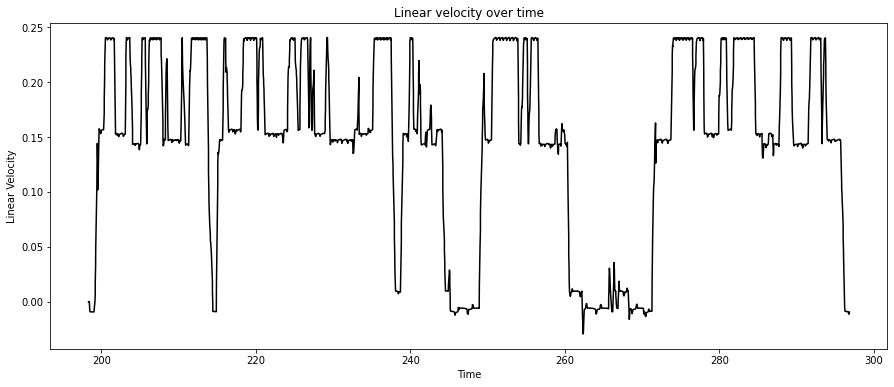

In [165]:
#Plot of linear velocity over time
lin_vel = odometrydf['linear.x'] + odometrydf['linear.y']

plt.title('Linear velocity over time')
plt.ylabel('Linear Velocity')
plt.xlabel('Time')
plt.rcParams['figure.figsize'] = [15, 6]
plt.plot(odometrydf['Time'], lin_vel, color='black')

plt.show()

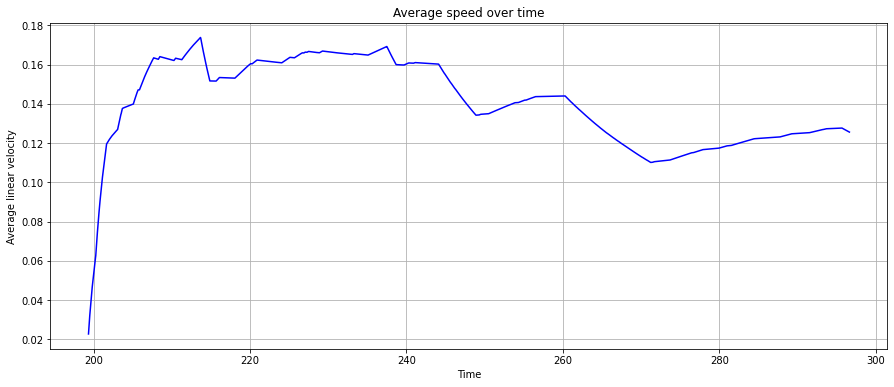

In [166]:
#Average speed over time
fig, ax = plt.subplots()
plt.title('Average speed over time')
plt.grid()
plt.xlabel('Time')
plt.ylabel('Average linear velocity')
plt.plot(vel_msgdf['Time'], vel_msgdf['angular.x'], color='b')
plt.show()